# **Plot skin friction *Cf* for the data-driven solver at *Re* = 3e6**

The following scenarios are investigated:

1. No wall function

2. With standard wall function

3. Data-driven wall function with correction at the wall (velocity & y+ blending)

4. Data-driven wall function with additional correction at the first face (velocity & y+ blending)

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"

In [2]:
UInf = 15.0
nuInf = 1.0e-05

model_sa = "SpalartAllmaras"
yp = ['0.05', '1', '2', '5', '10', '30', '50', '100']
res_list = ['1e-5']

In [3]:
tauw_path_nowall = [run + 'flatPlate_Re3e6/turbulentFlatPlate_SA_noWallFunc_Re3e6/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall = [pd.read_csv(tauw_path_nowall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_nowall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-4.06488,-0.145017,0
1,0.001458,-1.75701,-0.000416,0
2,0.002433,-1.28427,-0.000095,0
3,0.003410,-1.10963,-0.000043,0
4,0.004390,-0.99106,-0.000029,0


In [4]:
tauw_path_wall = [run + 'flatPlate_Re3e6/turbulentFlatPlate_SA_withWallFunc_Re3e6/yplus_{}/tauw_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall = [pd.read_csv(tauw_path_wall[i + len(res_list)*j], delim_whitespace=True) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_wall[0].head()

,ccx,tau_xx,tau_yy,tau_zz
0,0.000486,-4.064890,-0.145017,0
1,0.001458,-1.757010,-0.000416,0
2,0.002433,-1.284270,-0.000095,0
3,0.003410,-1.109640,-0.000043,0
4,0.004390,-0.991062,-0.000029,0


In [5]:
tauw_path_ddwall = [run + 'flatPlate_Re3e6/turbulentFlatPlate_Re3e6_wallCorr/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall = [pd.read_csv(tauw_path_ddwall[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddwall[0].head()

,ccx,1stFaceDistance,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,...,tau_y,skinFriction,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,5.556758e-07,1.0,1.0,0.00001,0.00001,31091.658027,32219.108121,3.212864e-13,406025.586826,...,-0.144905,0.036108,0.112791,2.013679e-03,0.224206,0.004021,5.345326,5.345105,-0.003413,-0.013627
1,0.001458,5.556758e-07,1.0,1.0,0.00001,0.00001,28757.819402,31275.368665,4.950172e-14,175578.144670,...,-0.000599,0.015607,0.048782,6.973977e-06,0.097535,0.000026,-0.471176,-0.470742,-0.003413,-0.018152
2,0.002433,5.556758e-07,1.0,1.0,0.00001,0.00001,28287.664656,31529.577381,2.880512e-14,128354.704561,...,-0.000137,0.011409,0.035662,1.586004e-06,0.071333,0.000006,1.076291,1.076393,-0.003413,-0.019079
3,0.003410,5.556758e-07,1.0,1.0,0.00001,0.00001,28114.196803,31623.233312,2.174129e-14,110923.751971,...,-0.000062,0.009860,0.030819,7.197999e-07,0.061636,0.000003,0.695549,0.695596,-0.003413,-0.019422
4,0.004390,5.556758e-07,1.0,1.0,0.00001,0.00001,27996.313538,31669.205185,1.779964e-14,99078.228106,...,-0.000041,0.008807,0.027528,4.782601e-07,0.055056,0.000002,0.833135,0.833166,-0.003413,-0.019654


In [6]:
tauw_path_ddface = [run + 'flatPlate_Re3e6/turbulentFlatPlate_Re3e6_faceCorr/yplus_{}/{}yp_surfaceFields.csv'.format(yp[j], yp[j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface = [pd.read_csv(tauw_path_ddface[i + len(res_list)*j]) for j in range(len(yp)) for i in range(len(res_list))]
tauw_data_ddface[0].head()

,ccx,1stFaceDistance,nuEff_wall_norm,nuEff_face_norm,nuEff_wall,nuEff_1st_face,wall_slope,face_slope,nut_face,magGradU_wall,...,tau_y,skinFriction,Ux_1st_cell,Uy_1st_cell,Ux_1st_face,Uy_1st_face,p_1st_cell,p_1st_face,scaled_y_face,scaled_avgU
0,0.000486,5.556758e-07,1.0,1.0,0.00001,0.00001,31091.647578,32219.098259,-1.558727e-12,406024.561754,...,-0.144905,0.036108,0.112791,2.013674e-03,0.224205,0.004021,5.345369,5.345148,-0.003413,-0.013627
1,0.001458,5.556758e-07,1.0,1.0,0.00001,0.00001,28757.815952,31275.370523,-5.447335e-13,175577.799998,...,-0.000599,0.015607,0.048782,6.973956e-06,0.097535,0.000026,-0.471126,-0.470692,-0.003413,-0.018152
2,0.002433,5.556758e-07,1.0,1.0,0.00001,0.00001,28287.662340,31529.578633,-3.291096e-13,128354.471787,...,-0.000137,0.011409,0.035662,1.586000e-06,0.071333,0.000006,1.076339,1.076441,-0.003413,-0.019079
3,0.003410,5.556758e-07,1.0,1.0,0.00001,0.00001,28114.194915,31623.234330,-2.591455e-13,110923.562288,...,-0.000062,0.009860,0.030819,7.197981e-07,0.061636,0.000003,0.695597,0.695644,-0.003413,-0.019422
4,0.004390,5.556758e-07,1.0,1.0,0.00001,0.00001,27996.311906,31669.205786,-2.148494e-13,99078.064156,...,-0.000041,0.008807,0.027528,4.782590e-07,0.055056,0.000002,0.833183,0.833214,-0.003413,-0.019654


In [7]:
x0 = 0
Rex = np.array((tauw_data_nowall[0]['ccx'] - x0)*UInf/nuInf)
Cf_nowall = np.array([np.sqrt(tauw_data_nowall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_nowall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))])
Cf_wall = np.array([np.sqrt(tauw_data_wall[i + len(res_list)*j]['tau_xx']**2 + tauw_data_wall[i + len(res_list)*j]['tau_yy']**2 + tauw_data_wall[i + len(res_list)*j]['tau_zz']**2)/(0.5*UInf**2) for j in range(len(yp)) for i in range(len(res_list))])
Cf_ddwall = np.array([tauw_data_ddwall[i + len(res_list)*j]['skinFriction'] for j in range(len(yp)) for i in range(len(res_list))])
Cf_ddface = np.array([tauw_data_ddface[i + len(res_list)*j]['skinFriction'] for j in range(len(yp)) for i in range(len(res_list))])

In [8]:
wieghardt = 0.288*(np.log10(Rex))**(-2.45)

### Comparison of *Cf* for various settings

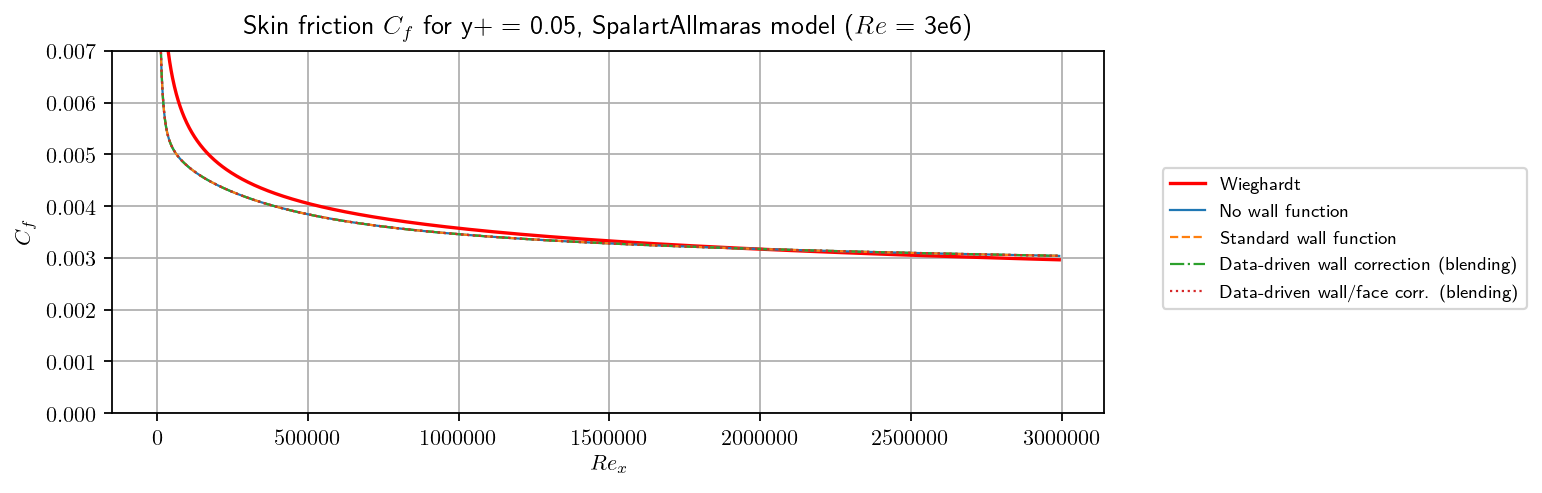

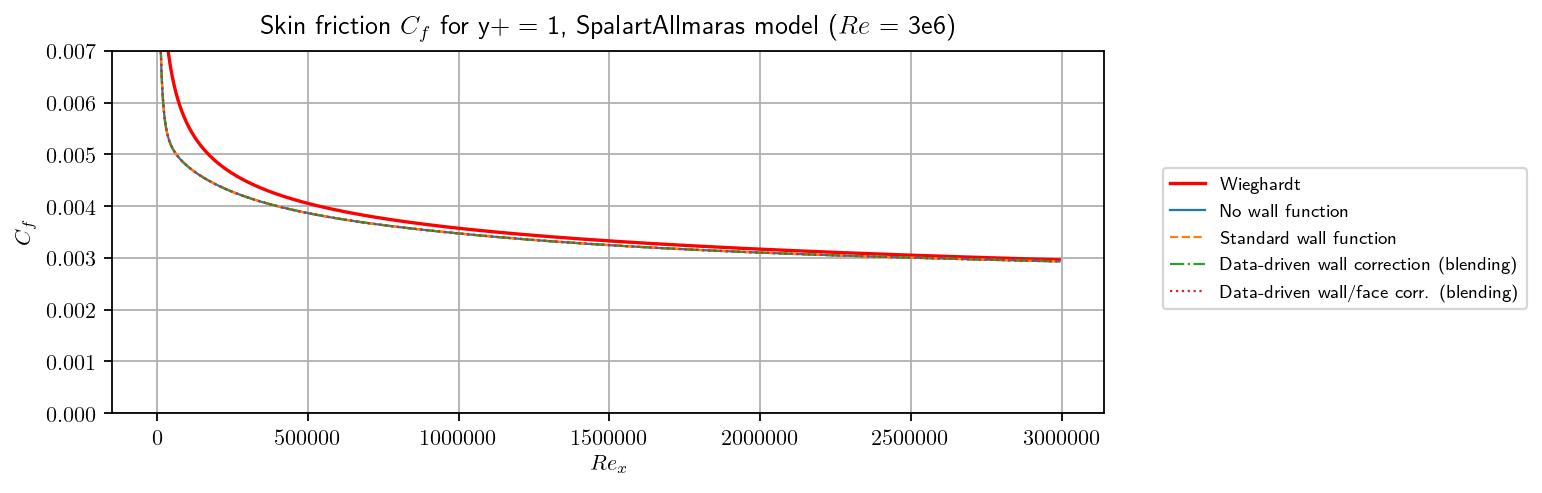

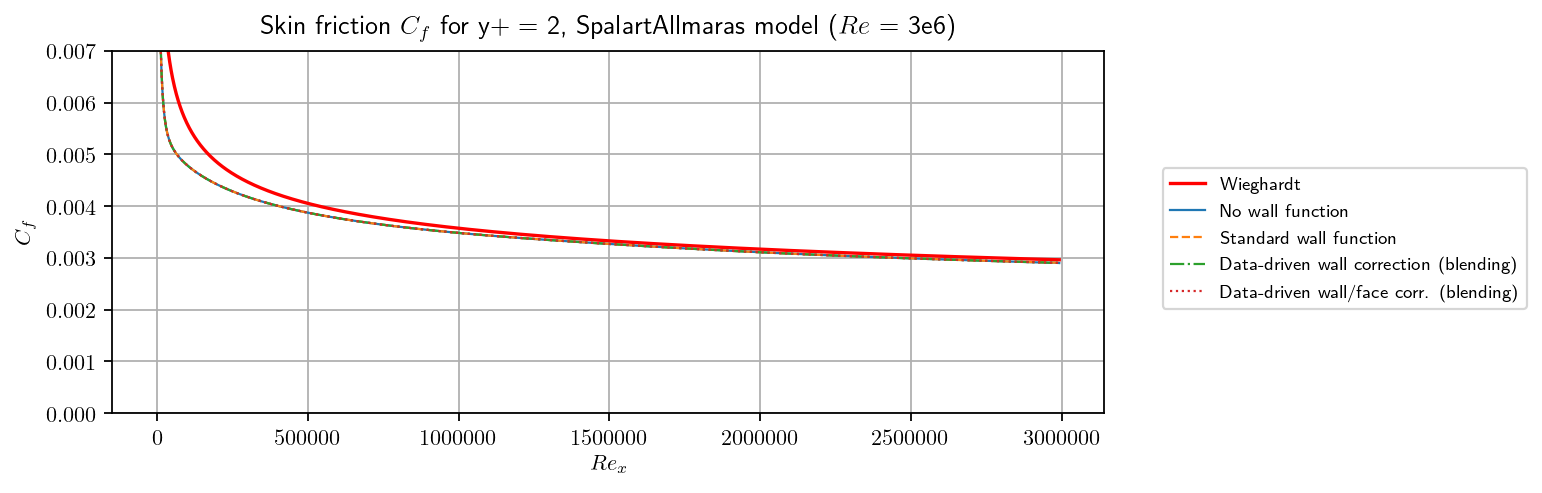

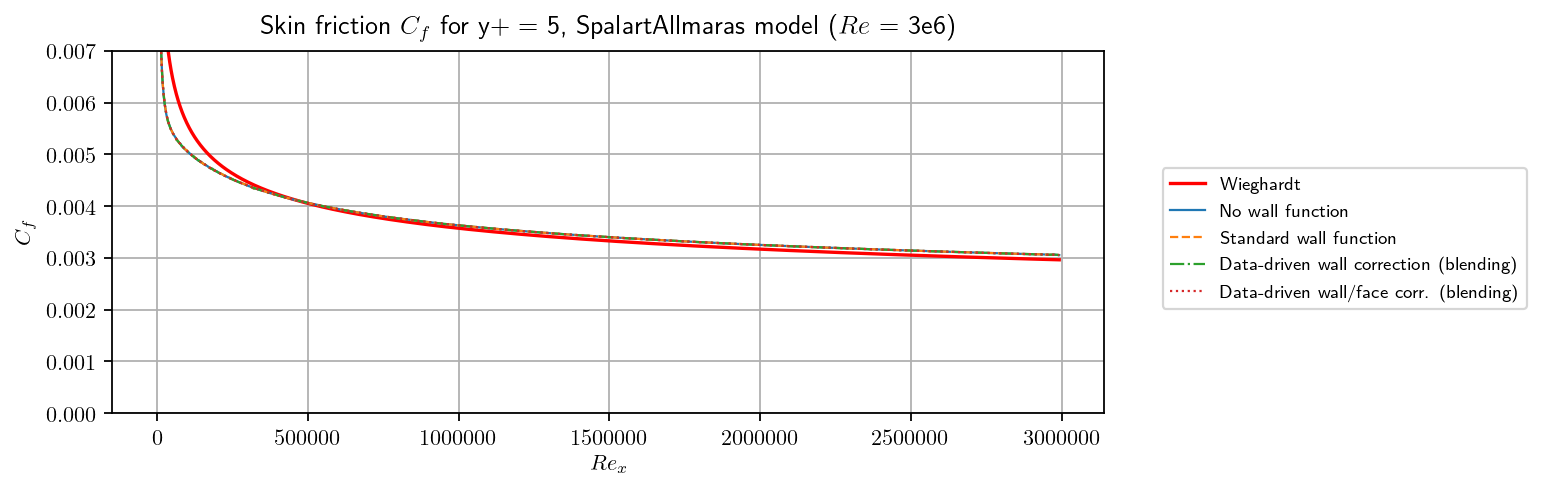

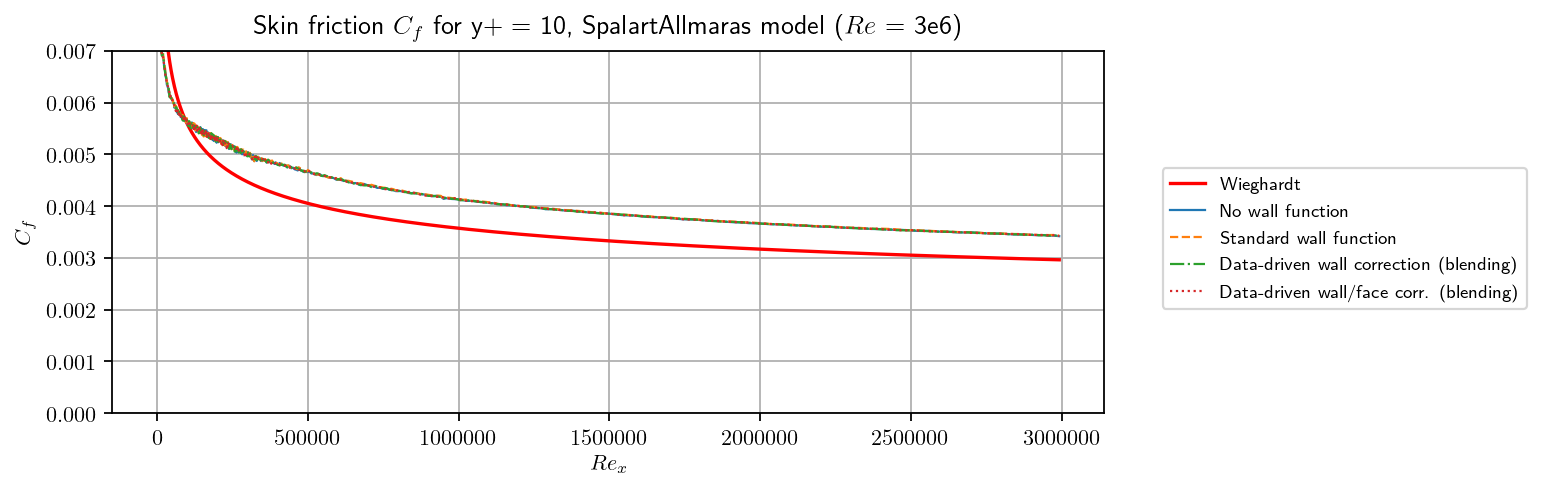

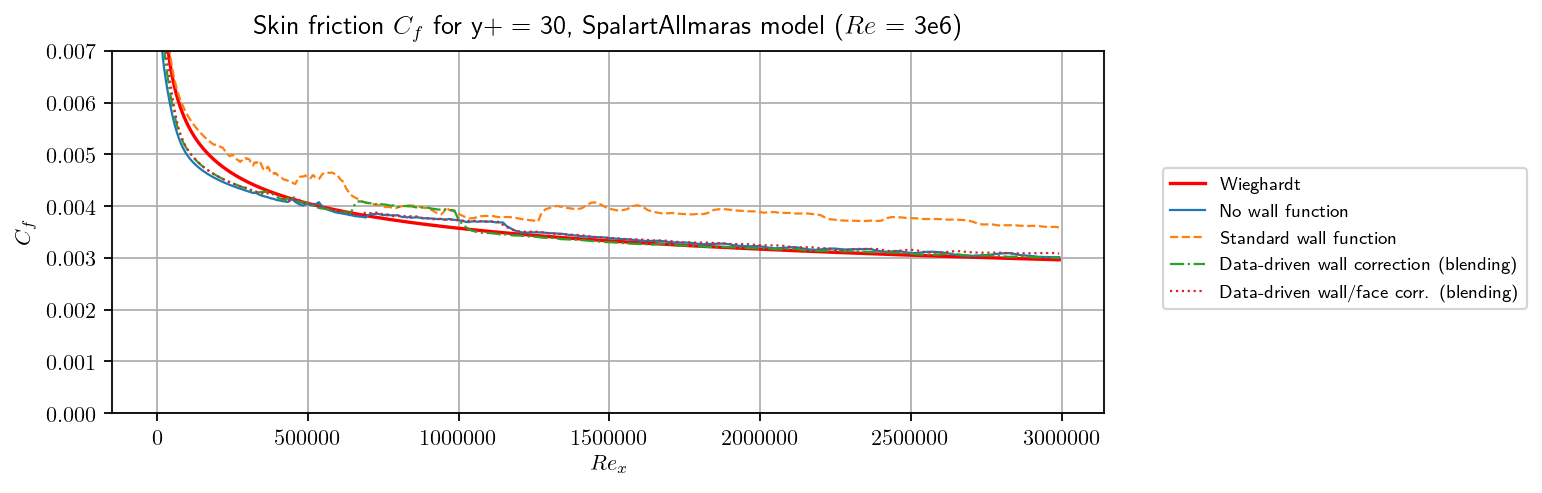

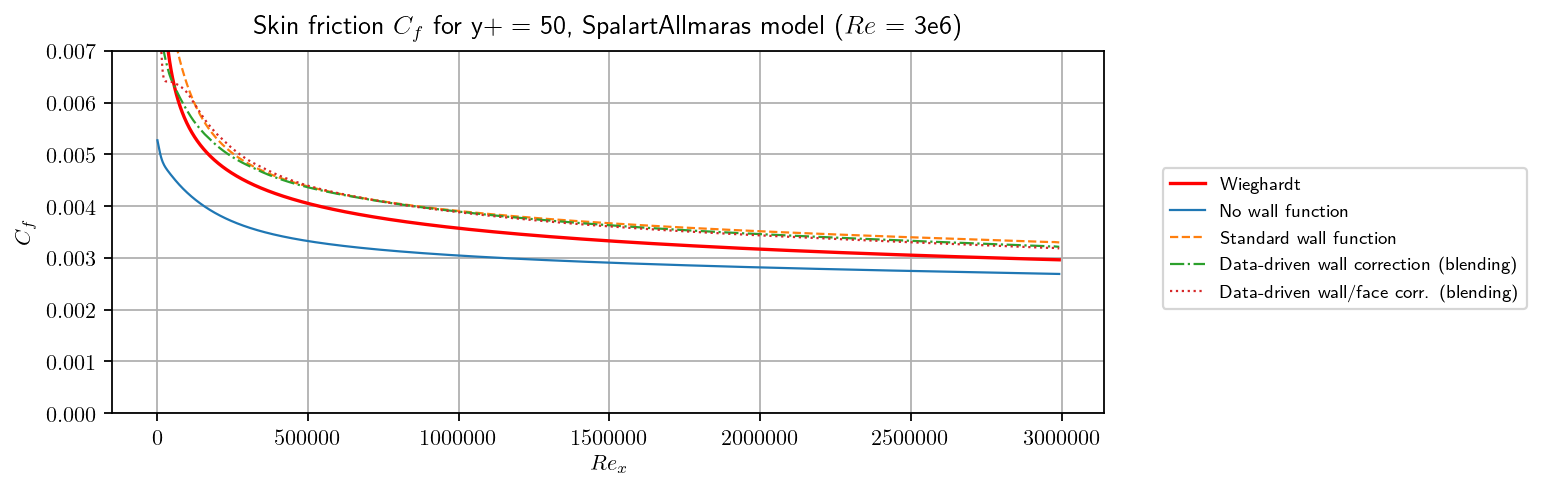

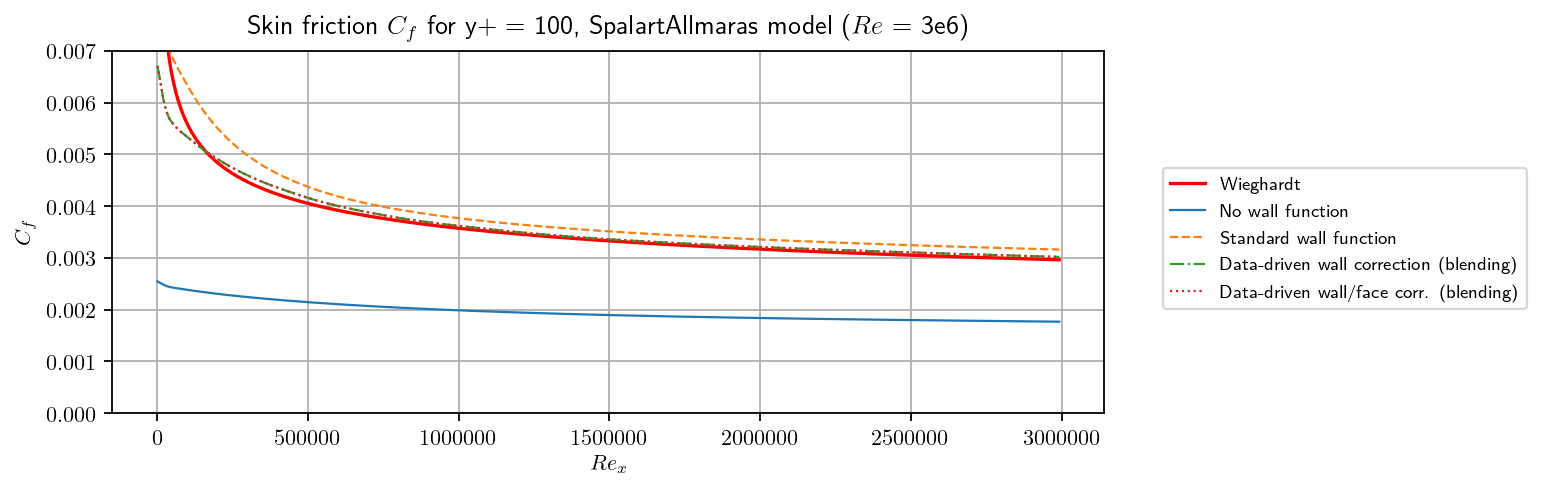

In [9]:
style = ["-", "--", "-.", ":"]
lw = 1.0
for j in range(len(yp)):
    fig, ax = plt.subplots(1, 1, figsize=(8, 3))
    plt.ylim([0, 0.007])
    plt.grid()
    ax.set_xlabel(r"$Re_x$")
    ax.set_ylabel(r"$C_f$")
    plt.title(r"Skin friction $C_f$ for y+ = {}, {} model ($Re$ = 3e6)".format(yp[j], model_sa))
    ax.plot(Rex, wieghardt, color = "r", label = "Wieghardt")    
    for i in range(len(res_list)):
        ax.plot(Rex, Cf_nowall[i + len(res_list)*j], label = "No wall function", ls = style[i], c = "C{:d}".format(i), lw = lw)
        ax.plot(Rex, Cf_wall[i + len(res_list)*j], label = "Standard wall function", ls = style[i+1], c = "C{:d}".format(i+1), lw = lw)
        ax.plot(Rex, Cf_ddwall[i + len(res_list)*j], label = "Data-driven wall correction (blending)", ls = style[i+2], c = "C{:d}".format(i+2), lw = lw)
        ax.plot(Rex, Cf_ddface[i + len(res_list)*j], label = "Data-driven wall/face corr. (blending)", ls = style[i+3], c = "C{:d}".format(i+3), lw = lw)
        ax.legend(fontsize = 8, bbox_to_anchor=(1.05, 0.7))        

### Comparison *Cf* of the case without wall function for different *y+*

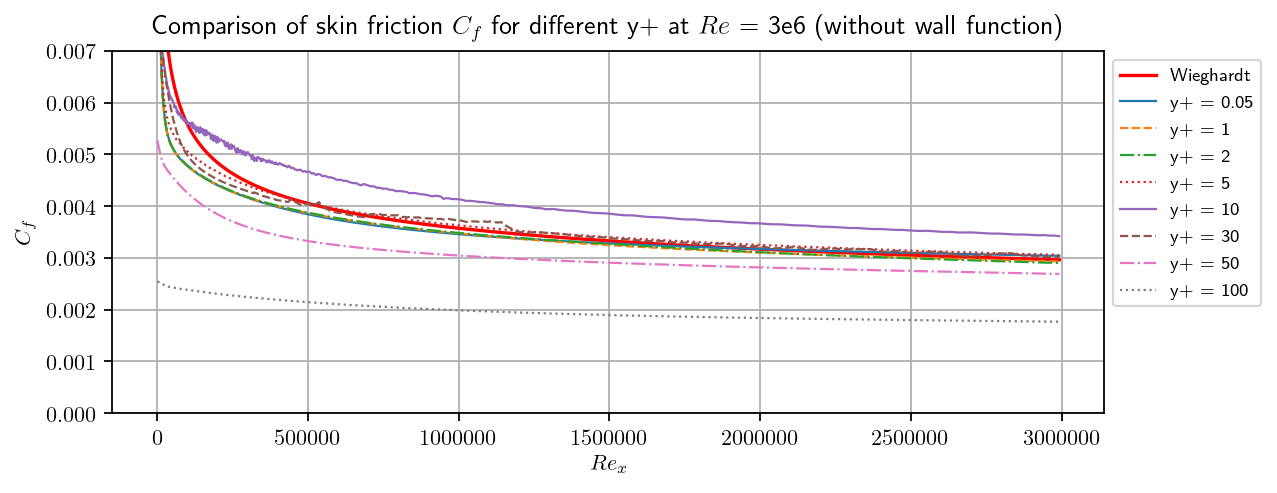

In [10]:
style2 = ["-", "--", "-.", ":"]
lw2 = 1.0
stylecycler = cycle(style2)

fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.007])
plt.grid()
ax2.set_xlabel(r"$Re_x$")
ax2.set_ylabel(r"$C_f$")
plt.title(r"Comparison of skin friction $C_f$ for different y+ at $Re$ = 3e6 (without wall function)")
ax2.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax2.plot(Rex, Cf_nowall[i + len(res_list)*j], label = "y+ = {}".format(yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax2.legend(fontsize = 8, bbox_to_anchor=(1, 1))

### Comparison *Cf* of the case with wall function for different *y+*

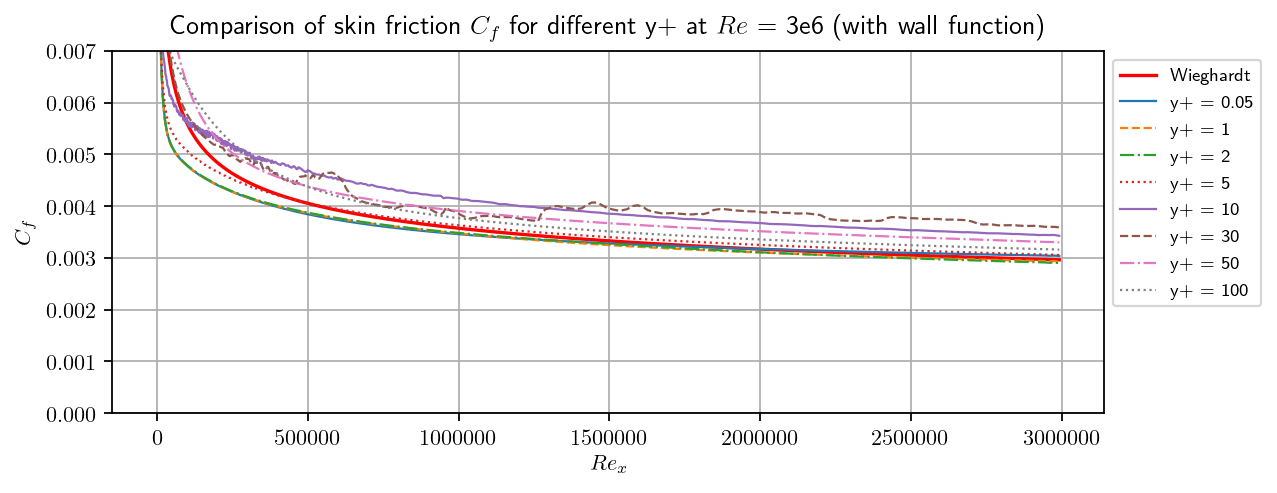

In [11]:
fig2_b, ax2_b = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.007])
plt.grid()
ax2_b.set_xlabel(r"$Re_x$")
ax2_b.set_ylabel(r"$C_f$")
plt.title(r"Comparison of skin friction $C_f$ for different y+ at $Re$ = 3e6 (with wall function)")
ax2_b.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax2_b.plot(Rex, Cf_wall[i + len(res_list)*j], label = "y+ = {}".format(yp[j]), ls = next(stylecycler), c = "C{:d}".format(j), lw = lw2)
        ax2_b.legend(fontsize = 8, bbox_to_anchor=(1, 1))

### Comparison *Cf* of data-driven wall modeling with the correction at the wall for different *y+*

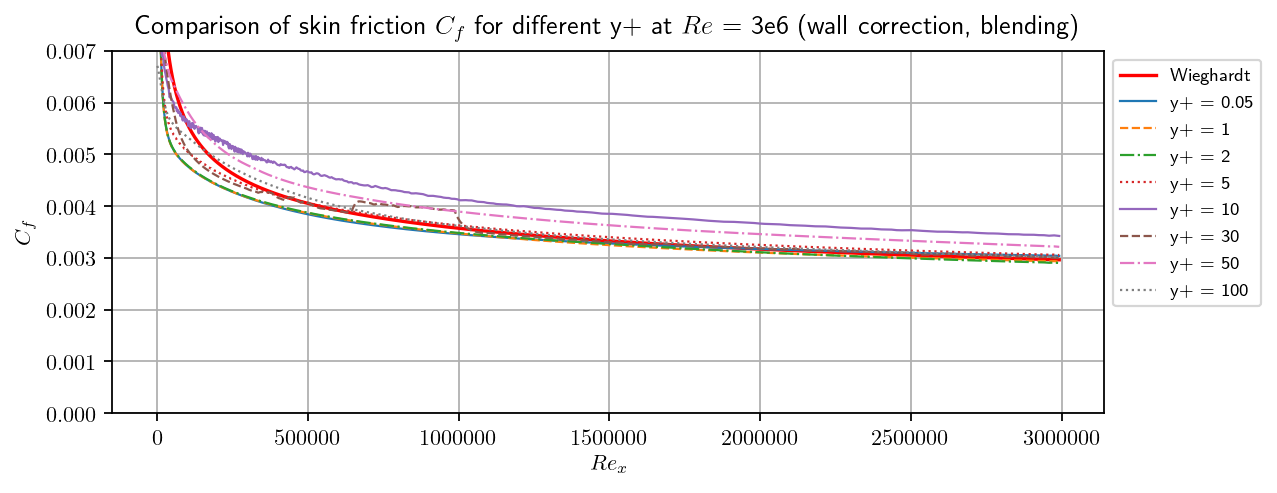

In [12]:
style3 = ["-", "--", "-.", ":"]
lw3 = 1.0
stylecycler2 = cycle(style3)

fig3, ax3 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.007])
plt.grid()
ax3.set_xlabel(r"$Re_x$")
ax3.set_ylabel(r"$C_f$")
plt.title(r"Comparison of skin friction $C_f$ for different y+ at $Re$ = 3e6 (wall correction, blending)")
ax3.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax3.plot(Rex, Cf_ddwall[i + len(res_list)*j], label = "y+ = {}".format(yp[j]), ls = next(stylecycler2), c = "C{:d}".format(j), lw = lw3)
        ax3.legend(fontsize = 8, bbox_to_anchor=(1, 1))

### Comparison *Cf* of data-driven wall modeling with the correction at the first face for different *y+*

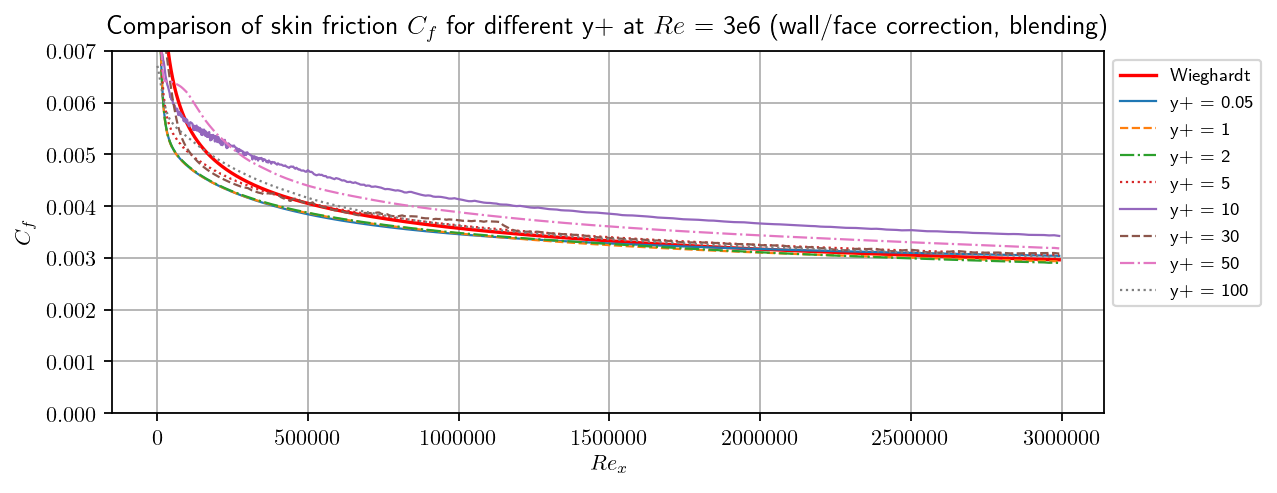

In [13]:
style4 = ["-", "--", "-.", ":"]
lw4 = 1.0
stylecycler3 = cycle(style4)

fig4, ax4 = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.007])
plt.grid()
ax4.set_xlabel(r"$Re_x$")
ax4.set_ylabel(r"$C_f$")
plt.title(r"Comparison of skin friction $C_f$ for different y+ at $Re$ = 3e6 (wall/face correction, blending)")
ax4.plot(Rex, wieghardt, color = "r", label = "Wieghardt")
for j in range(len(yp)):
    for i in range(len(res_list)):
        ax4.plot(Rex, Cf_ddface[i + len(res_list)*j], label = "y+ = {}".format(yp[j]), ls = next(stylecycler3), c = "C{:d}".format(j), lw = lw4)
        ax4.legend(fontsize = 8, bbox_to_anchor=(1, 1))

### Comparison of Cf between standard wall function and data-driven wall model

In [14]:
mean_Cf_nowall = np.array([Cf_nowall[:, i].mean() for i in range(Cf_nowall.shape[1])])
mean_Cf_wall = np.array([Cf_wall[:, i].mean() for i in range(Cf_wall.shape[1])])
mean_Cf_ddwall = np.array([Cf_ddwall[:, i].mean() for i in range(Cf_ddwall.shape[1])])
mean_Cf_ddface = np.array([Cf_ddface[:, i].mean() for i in range(Cf_ddface.shape[1])])

In [15]:
std_Cf_nowall = np.array([np.std(Cf_nowall[:, i]) for i in range(Cf_nowall.shape[1])])
std_Cf_wall = np.array([np.std(Cf_wall[:, i]) for i in range(Cf_wall.shape[1])])
std_Cf_ddwall = np.array([np.std(Cf_ddwall[:, i]) for i in range(Cf_ddwall.shape[1])])
std_Cf_ddface = np.array([np.std(Cf_ddface[:, i]) for i in range(Cf_ddface.shape[1])])

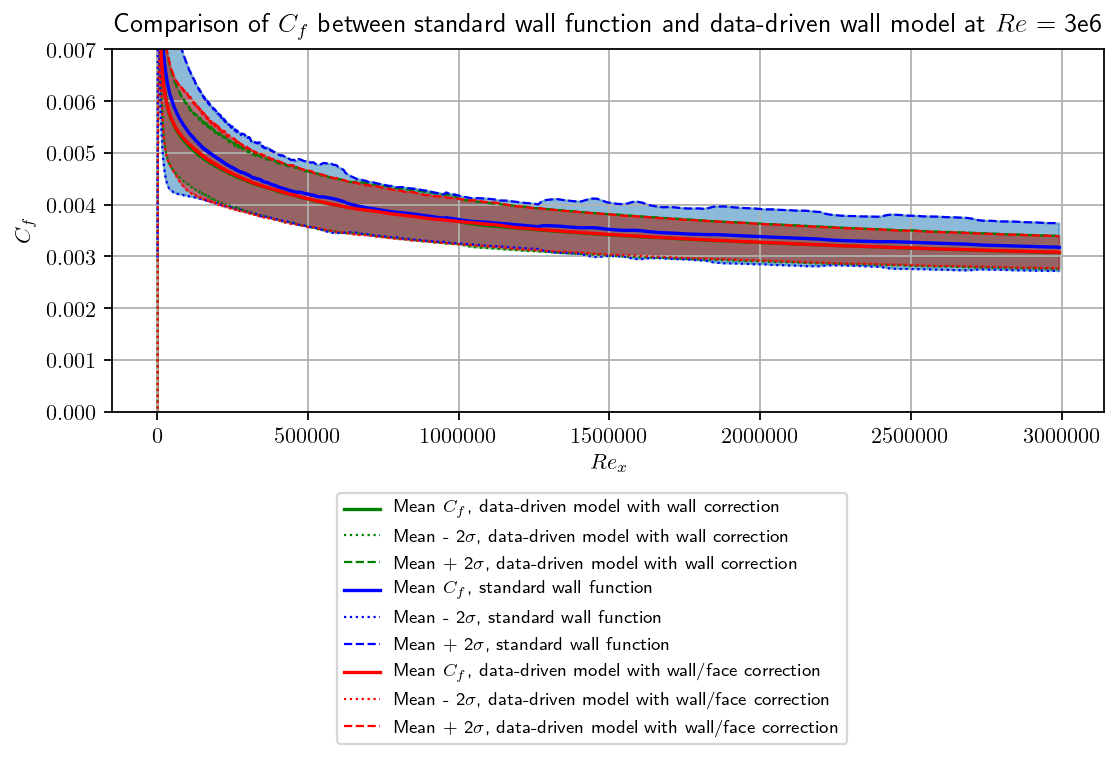

In [16]:
style = ["-", "--", ":"]
lw = 1.0

fig, ax = plt.subplots(1, 1, figsize=(8, 3))
plt.ylim([0, 0.007])
plt.grid()
ax.set_xlabel(r"$Re_x$")
ax.set_ylabel(r"$C_f$")
plt.title(r"Comparison of $C_f$ between standard wall function and data-driven wall model at $Re$ = 3e6")
ax.plot(Rex, mean_Cf_ddwall, color = "g", label = r"Mean $C_f$, data-driven model with wall correction")
ax.plot(Rex, mean_Cf_ddwall - 2*std_Cf_ddwall, label = r"Mean - 2$\sigma$, data-driven model with wall correction", ls = style[2], c = "g", lw = lw)
ax.plot(Rex, mean_Cf_ddwall + 2*std_Cf_ddwall, label = r"Mean + 2$\sigma$, data-driven model with wall correction", ls = style[1], c = "g", lw = lw)
plt.fill_between(Rex, mean_Cf_ddwall - 2*std_Cf_ddwall, mean_Cf_ddwall + 2*std_Cf_ddwall, color = "C{:d}".format(2), alpha=0.5)
ax.plot(Rex, mean_Cf_wall, color = "b", label = r"Mean $C_f$, standard wall function")
ax.plot(Rex, mean_Cf_wall - 2*std_Cf_wall, label = r"Mean - 2$\sigma$, standard wall function", ls = style[2], c = "b", lw = lw)
ax.plot(Rex, mean_Cf_wall + 2*std_Cf_wall, label = r"Mean + 2$\sigma$, standard wall function", ls = style[1], c = "b", lw = lw)
plt.fill_between(Rex, mean_Cf_wall - 2*std_Cf_wall, mean_Cf_wall + 2*std_Cf_wall, color = "C{:d}".format(0), alpha=0.5)
ax.plot(Rex, mean_Cf_ddface, color = "r", label = r"Mean $C_f$, data-driven model with wall/face correction")
ax.plot(Rex, mean_Cf_ddface - 2*std_Cf_ddface, label = r"Mean - 2$\sigma$, data-driven model with wall/face correction", ls = style[2], c = "r", lw = lw)
ax.plot(Rex, mean_Cf_ddface + 2*std_Cf_ddface, label = r"Mean + 2$\sigma$, data-driven model with wall/face correction", ls = style[1], c = "r", lw = lw)
plt.fill_between(Rex, mean_Cf_ddface - 2*std_Cf_ddface, mean_Cf_ddface + 2*std_Cf_ddface, color = "C{:d}".format(3), alpha=0.5)
ax.legend(fontsize = 8, bbox_to_anchor=(0.75, -0.2))